<a href="https://colab.research.google.com/github/prince-musonda/100-days-of-web-development/blob/main/The_Exponential_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The purpose of this notebook is to create a basic generative adversary neural network that generates a pair of 2 numbers (x,y). Assuming that you invested $1 into  a bank, a an interest rate of 8%, X represents the time in years, and Y represents the amount of money your will have in your account after X years.**

# **Create training data to create  an exponential growth shape**

In [5]:
import torch
torch.manual_seed(0)
obervations = 2048
train_data = torch.zeros((obervations,2)) # 2048 rows, 2 columns
train_data[:,0] = 50* torch.rand(obervations) # values of x  between 0 and  50
train_data[:,1] = 1.08 ** train_data[:,0] #  values of y based on y= 1.08^x


# Visualize the relationship between x and y, basically just draw the exponential growth graph

In [6]:
from matplotlib import pyplot as plt

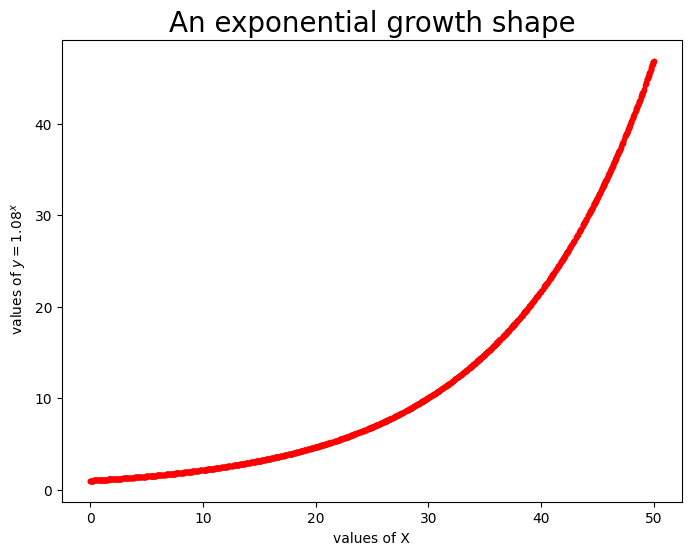

In [9]:
plt.figure(dpi=100, figsize=(8,6))
plt.plot(train_data[:,0],train_data[:,1],".",c="r")
plt.xlabel("values of X")
plt.ylabel(" values of $y=1.08^x$")
plt.title("An exponential growth shape", fontsize=20)
plt.show()

# prepare the training data in batches to be feed to the discriminator

In [10]:
from torch.utils.data import DataLoader

In [11]:
batch_size=128
train_dataloader = DataLoader(train_data,shuffle=True, batch_size=batch_size)

# create discriminator neural network

In [12]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [14]:
D = nn.Sequential(
    nn.Linear(2,256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64,1),
    nn.Sigmoid()
).to(device)

# Create a generator network

In [15]:
G = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU(),
    nn.Linear(32,2)
).to(device)

# declare loss function and optimizer

The purpose of the discriminator is to be able to identify fake samples from fake ones, and the purpose of the generator is to create  samples that are able to pass through the discrimators detection

In [16]:
loss_fn = nn.BCELoss()
optimD = torch.optim.Adam(params=D.parameters(), lr=0.0005)
optimG = torch.optim.Adam(params=G.parameters(), lr=0.0005)
